# **DeepFashion2 Dataset**

To get the data to Colab environment do the shortcut thing
https://drive.google.com/drive/folders/125F48fsMBz2EF0Cpqk6aaHet5VH399Ok?usp=sharing


In [1]:
!git clone https://github.com/KirillDemochkin/NeuralFashionGAN.git
!cd NeuralFashionGAN && git checkout dataset_maksim

fatal: destination path 'NeuralFashionGAN' already exists and is not an empty directory.
Already on 'dataset_maksim'
Your branch is up to date with 'origin/dataset_maksim'.


In [2]:
!pip install albumentations==0.4.5

In [2]:
# Detect if we are in Google Colaboratory
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

from pathlib import Path
# Determine the locations of auxiliary libraries and datasets.
# `AUX_DATA_ROOT` is where train/ test/ validation/ sets are.
if IN_COLAB:
    google.colab.drive.mount("/content/drive")
    
    # Change this if you created the shortcut in a different location
    # AUX_DATA_ROOT = Path("/content/drive/My Drive/DeepFashion2 Dataset")
    AUX_DATA_ROOT = Path("/content/drive/My Drive/DeepFashion2")

    assert AUX_DATA_ROOT.is_dir(), "Have you forgotten to 'Add a shortcut to Drive'?"
    
    import sys
    sys.path.insert(0, str(AUX_DATA_ROOT))
else:
    AUX_DATA_ROOT = Path(".")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


***Extract Zipped Images***

In [0]:
local_dataset_root = "."

In [4]:
%%time
%%bash -s "$AUX_DATA_ROOT" "$local_dataset_root"
set -e

remote_root=$1
local_root=$2
mkdir -p $local_root
for filename in validation.zip #train.zip validation.zip
do
  cp "$remote_root/$filename" $local_root
  unzip -P 2019Deepfashion2** -q "$local_root/$filename" -d $local_root
done

CPU times: user 5.62 ms, sys: 4.92 ms, total: 10.5 ms
Wall time: 1min 26s


---

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from NeuralFashionGAN.datasets.deepfashion2 import DeepFashion2Dataset

from albumentations import (
    HorizontalFlip,
    RandomCrop,
    Compose,
    RandomBrightnessContrast,    
    SmallestMaxSize,
    Resize
)
from albumentations.pytorch import ToTensorV2

In [0]:
resize_width = resize_height = 282
crop_width = crop_height = 256

train_trasform = Compose([Resize(resize_height, resize_width),
                          RandomCrop(crop_height, crop_width),
                          HorizontalFlip(p=0.5),              
                          RandomBrightnessContrast(p=0.8),
                          ToTensorV2()])

val_trasform = ToTensorV2()

# train_dataset = DeepFashion2Dataset('train', transform=train_trasform)
# val_dataset = DeepFashion2Dataset('validation', transform=val_trasform)
val_train_dataset = DeepFashion2Dataset('validation', transform=train_trasform)

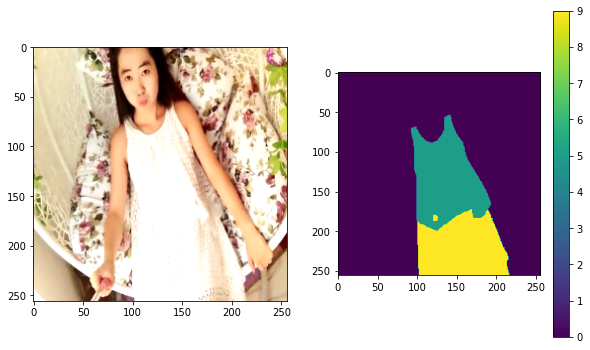

In [20]:
image, mask = val_train_dataset[118]

plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.imshow(image.numpy().transpose((1, 2, 0)))
# plt.axis('off')

plt.subplot(122)
plt.imshow(mask)
# plt.axis('off')
plt.colorbar()